In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns',25)

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# EDA

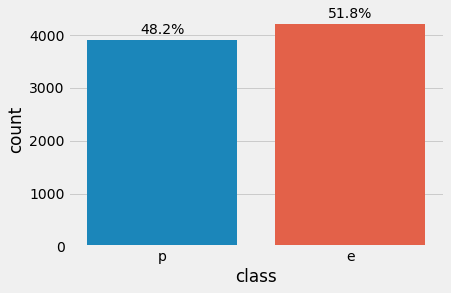

In [4]:
splot =sns.countplot(df['class'])
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['class']))
    x = p.get_x() + p.get_width() / 2.
    y =p.get_height()
    splot.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
df.columns=df.columns.str.replace('-','_')

In [7]:
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [19]:
df2=df.copy()

# DATA CLEANING

In [20]:
df2 =df2.replace('?',np.nan)

In [21]:
values=[]
for i in df2.columns:
    values.append(len(df2[i].unique()))

In [22]:
nan_values =[]
for i in df2.columns:
    nan_values.append(df2[i].isnull().sum())

In [23]:
nan_values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2480, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
# find the unique and nan values
unique_value = pd.DataFrame(sorted(zip(df2.columns,values,nan_values)),columns=['feature','unique_value','nan_values'])
unique_value

,feature,unique_value,nan_values
0,bruises,2,0
1,cap_color,10,0
2,cap_shape,6,0
3,cap_surface,4,0
4,class,2,0
5,gill_attachment,2,0
6,gill_color,12,0
7,gill_size,2,0
8,gill_spacing,2,0
9,habitat,7,0


In [ ]:
df

In [26]:
# do factorize as it has nan value
df2['stalk_root'],stalk_root_abels =pd.factorize(df2['stalk_root'])
df2

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,0,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,1,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,1,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,0,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,0,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,-1,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,-1,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,-1,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,-1,s,k,w,w,p,w,o,e,w,v,l


In [27]:
df2['stalk_root'].isna().sum()

0

In [202]:
from sklearn.preprocessing import LabelEncoder
for i in df2:
        encoder=LabelEncoder()
        df2[i]=encoder.fit_transform(df2[i])    

In [203]:
df2

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,1,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,1,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,1,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


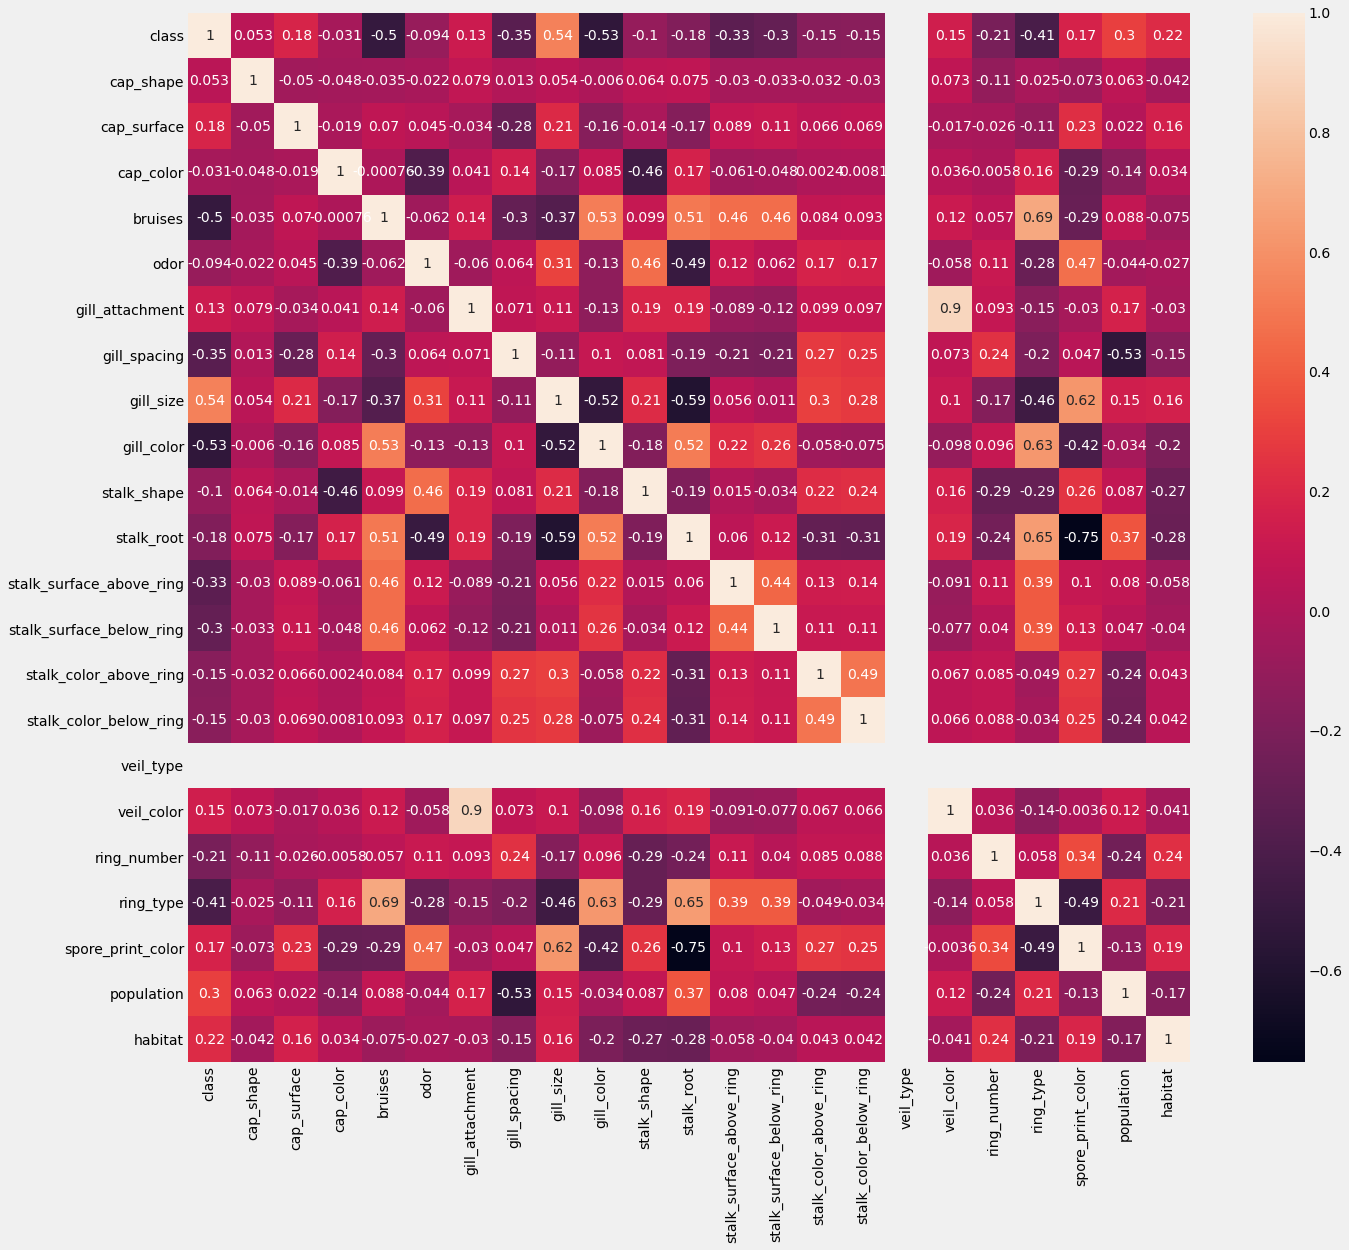

In [204]:
plt.figure(figsize=(20,18))
sns.heatmap(df2.corr(),annot=True)

# Model Building

In [252]:
X=df2.drop('class',axis=1)
y=df2['class']

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

## LogisticRegression

In [207]:
from sklearn.linear_model import LogisticRegression
logestic_regression_model =LogisticRegression()
logestic_regression_model.fit(X_train,y_train)
y_pred =logestic_regression_model.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9396923076923077

## RandomForestClassifier

In [253]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model =RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
y_pred =random_forest_model.predict(X_test)
print('accuracy...',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy... 1.0
[[839   0]
 [  0 786]]


## PCA

In [224]:
from sklearn.decomposition import PCA
#how many calsses i need
pca_model =PCA(n_components=2)
composed_data =pca_model.fit_transform(df3)

In [225]:
composed_data.shape

(8124, 2)

In [228]:
composed_df=pd.DataFrame(composed_data,columns=['poisonous','edible'])
composed_df['class']=df3['class']

In [229]:
composed_df

,poisonous,edible,class
0,0.040849,-0.223394,1
1,-2.091422,4.732186,0
2,-1.802969,2.407133,0
3,-1.423062,1.735121,1
4,1.310328,-0.904809,0
...,...,...,...
8119,-6.234953,-2.475795,0
8120,-6.283451,-2.439056,0
8121,-1.702474,0.361927,0
8122,7.426034,-1.236542,1


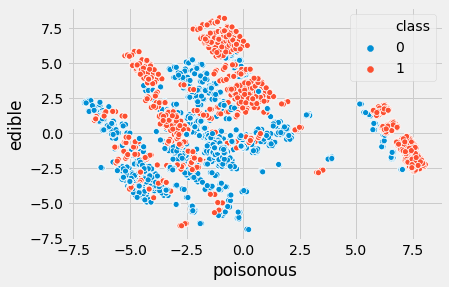

In [235]:
sns.scatterplot(composed_df['poisonous'],composed_df['edible'],hue=composed_df['class'])

In [241]:
composed_X= composed_df.drop('class',axis=1)
composed_y=composed_df['class']

In [242]:
composed_X

,poisonous,edible
0,0.040849,-0.223394
1,-2.091422,4.732186
2,-1.802969,2.407133
3,-1.423062,1.735121
4,1.310328,-0.904809
...,...,...
8119,-6.234953,-2.475795
8120,-6.283451,-2.439056
8121,-1.702474,0.361927
8122,7.426034,-1.236542
